# COVID-19 Data Analysis and Clustering
### Overview
* This repository contains Python code for analyzing COVID-19 data and performing clustering to identify patterns in the spread of the virus. The analysis encompasses exploratory data analysis (EDA), data preprocessing, and clustering using the KMeans algorithm.

### Dataset
* The dataset used in this project contains comprehensive COVID-19 statistics, including information such as confirmed cases, deaths, recoveries, and active cases, aggregated by country or region. The dataset is stored in the file covid_19_clean_complete.csv.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

In [2]:
df = pd.read_csv("covid_19_clean_complete.csv")

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [4]:
df.isnull().sum() #count of missing values

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [5]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


C:\Users\lenovo\AppData\Local\Temp\ipykernel_13720\2870210932.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Recovered'],bins=10,color='blue')


<Axes: xlabel='Recovered', ylabel='Density'>

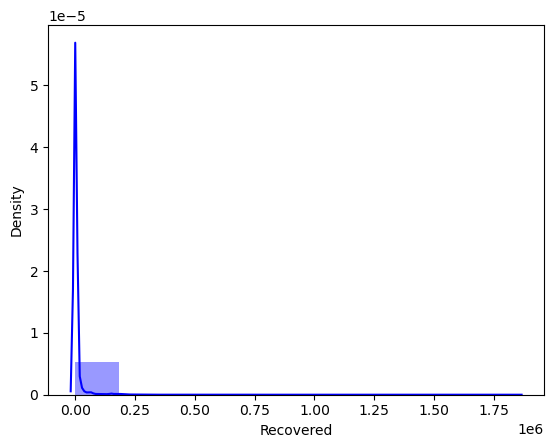

In [6]:
sns.distplot(df['Recovered'],bins=10,color='blue')

In [7]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


* It iterates over the top 10 countries with the highest frequency of occurrence in the 'Country/Region' column of the DataFrame df. For each country, it creates a histogram using Seaborn's histplot function to visualize the distribution of data points associated with that country.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'China'),
  Text(1, 0, 'Canada'),
  Text(2, 0, 'France'),
  Text(3, 0, 'United Kingdom'),
  Text(4, 0, 'Australia'),
  Text(5, 0, 'Netherlands'),
  Text(6, 0, 'Denmark'),
  Text(7, 0, 'Afghanistan'),
  Text(8, 0, 'Saudi Arabia'),
  Text(9, 0, 'Romania')])

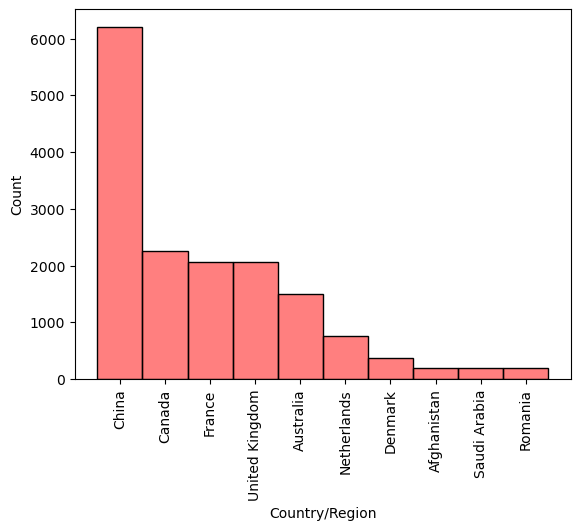

In [8]:
top_10_Countries = df['Country/Region'].value_counts().head(10).index
for country in top_10_Countries:
    subset = df[df['Country/Region'] == country]
    sns.histplot(data=subset, x='Country/Region', kde=True, color='red')
plt.xticks(ticks=range(len(top_10_Countries)), labels=top_10_Countries)
plt.xticks(rotation=90)

<Axes: ylabel='Frequency'>

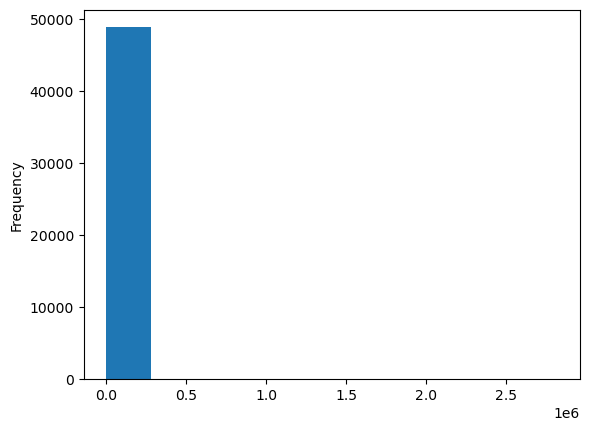

In [9]:
df['Active'].plot.hist()

In [11]:
df.drop(["Province/State"],axis =1,inplace =True)


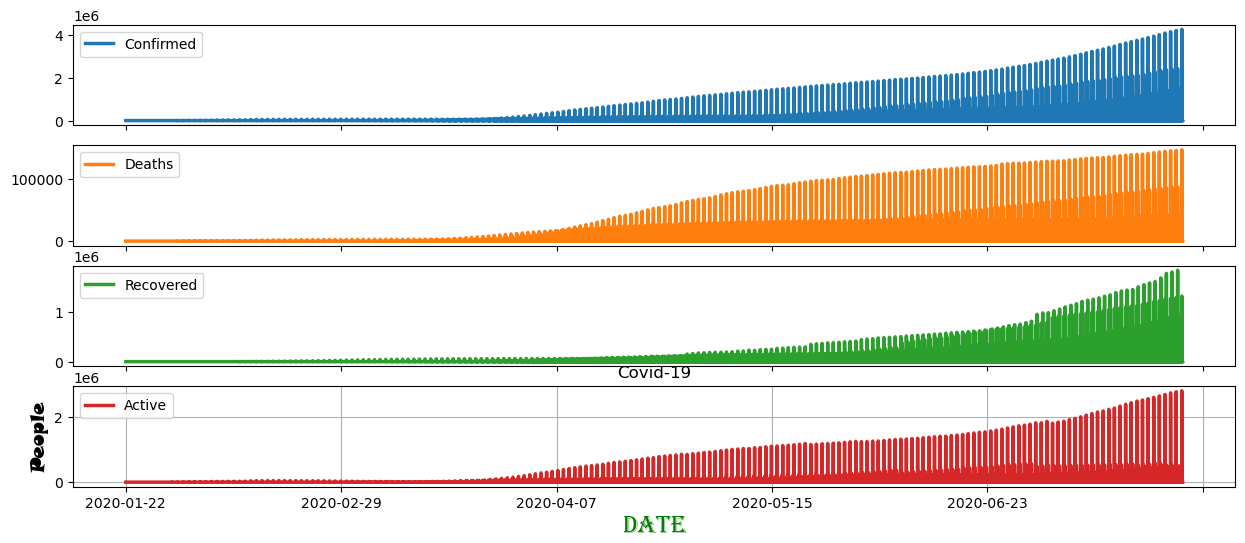

In [13]:
df.plot(x="Date",y=["Confirmed","Deaths","Recovered","Active"],subplots=True,linewidth=2.5,figsize=(15,6))
plt.xlabel("Date",fontname="ALGERIAN",fontsize=18,color="Green")
plt.ylabel("People",fontsize=14,fontname="Snap ITC")
plt.title("Covid-19")
plt.grid()

In [14]:
df.drop(["Country/Region", "Date", "WHO Region"], axis=1,inplace=True)


In [15]:
df

,Lat,Long,Confirmed,Deaths,Recovered,Active
0,33.939110,67.709953,0,0,0,0
1,41.153300,20.168300,0,0,0,0
2,28.033900,1.659600,0,0,0,0
3,42.506300,1.521800,0,0,0,0
4,-11.202700,17.873900,0,0,0,0
...,...,...,...,...,...,...
49063,0.186400,6.613100,865,14,734,117
49064,15.552727,48.516388,1691,483,833,375
49065,-11.645500,43.333300,354,7,328,19
49066,38.861000,71.276100,7235,60,6028,1147


In [16]:
df.shape

(49068, 6)

* This creates a boxplot to visualize the distribution and spread of values for the attributes 'Confirmed', 'Deaths', 'Recovered', and 'Active' in the DataFrame df. 

Text(0.5, 0, 'Attributes')

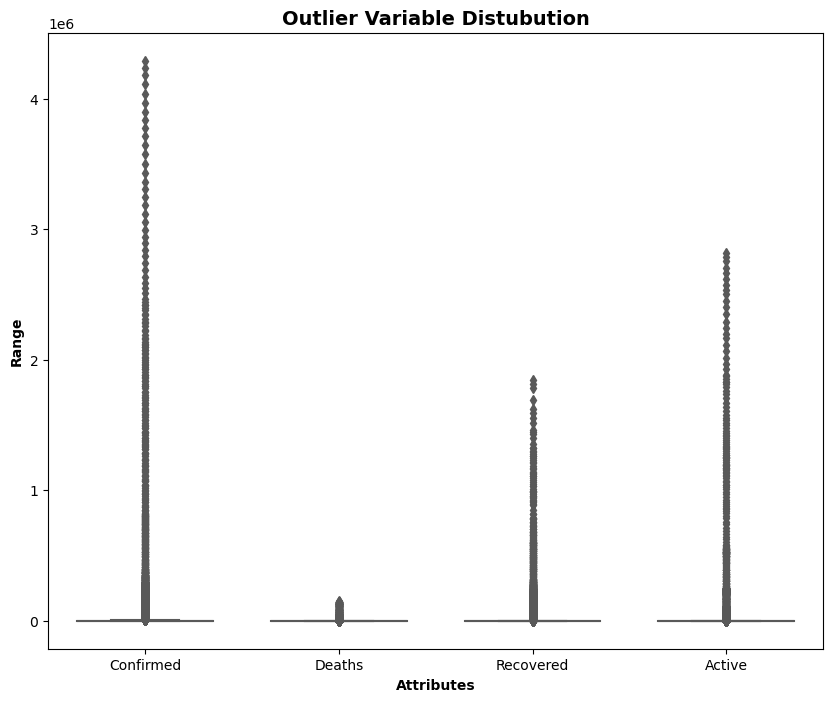

In [17]:
attributes = ['Confirmed','Deaths','Recovered',"Active"]
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df[attributes],orient="v", palette='Set2',whis=1.5,saturation=1,width=0.7)
plt.title("Outlier Variable Distubution",fontsize = 14, fontweight = 'bold')
plt.ylabel("Range",fontweight = 'bold')
plt.xlabel("Attributes",fontweight = 'bold')

* This performs outlier removal for the 'Confirmed', 'Deaths', 'Recovered', and 'Active' attributes in the DataFrame df using the interquartile range (IQR) method. 

In [18]:
Q1 = df.Confirmed.quantile(0.05) #Calculate the 5th percentile (Q1) of the 'Confirmed' attribute. 
Q3 = df.Confirmed.quantile (0.95) #Calculate the 95th percentile (Q3) of the 'Confirmed' attribute.
IQR = Q3- Q1

df = df[(df.Confirmed >= Q1- 1.5*IQR) & (df.Confirmed<= Q3 + 1.5*IQR)]
# Removing (statistical) outliers for Deaths
Q1 = df. Deaths.quantile(0.05)
Q3 = df.Deaths.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.Deaths >= Q1 - 1.5*IQR) & (df.Deaths<= Q3 + 1.5*IQR)]
# Removing (statistical) outliers for Recovered
Q1 = df.Recovered.quantile(0.05)
Q3 = df.Recovered.quantile(0.95)
IQR = Q3 - Q1

df= df[(df.Recovered>= Q1- 1.5*IQR) & (df.Recovered<=Q3 + 1.5*IQR)]

Q1 = df.Active.quantile(0.05)
Q3 = df.Active.quantile(0.95)

IQR = Q3-Q1

df = df[(df.Active>=Q1-1.5*IQR) & (df.Active <=1.5*IQR) ]

In [19]:
df.shape

(44240, 6)

In [20]:
from sklearn.preprocessing import StandardScaler

# Assuming df contains the DataFrame with columns 'Confirmed', 'Recovered', 'Active', and 'Deaths'
df1 = df[['Confirmed', 'Recovered', 'Active', 'Deaths']]

scaler = StandardScaler()

df_covid_scaler = scaler.fit_transform(df1)
df_covid_scaler.shape


(44240, 4)

* This code converts the scaled data obtained from StandardScaler into a DataFrame and assigns appropriate column names to the DataFrame.

In [21]:
df_covid_scaler = pd.DataFrame(df_covid_scaler)
df_covid_scaler.columns = ['Confirmed','Recovered','Active',"Deaths"]
df_covid_scaler.head()

,Confirmed,Recovered,Active,Deaths
0,-0.397658,-0.321079,-0.389626,-0.29125
1,-0.397658,-0.321079,-0.389626,-0.29125
2,-0.397658,-0.321079,-0.389626,-0.29125
3,-0.397658,-0.321079,-0.389626,-0.29125
4,-0.397658,-0.321079,-0.389626,-0.29125


* This performs the elbow method to determine the optimal number of clusters (k) for K-means clustering based on the sum of squared distances (SSD) within clusters.

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

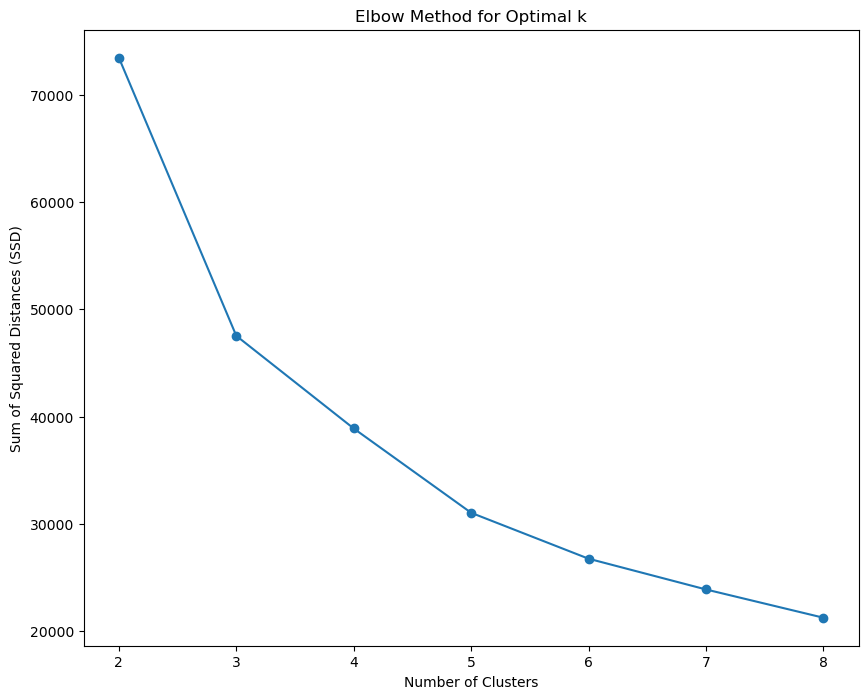

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=num_cluster, max_iter=50)
    kmeans.fit(df_covid_scaler)
    ssd.append(kmeans.inertia_)

plt.plot(range_n_clusters, ssd, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method for Optimal k')
plt.show()


This initializes a KMeans clustering model with three clusters and a maximum number of iterations set to 50, fits the model to the scaled data stored in the DataFrame df_covid_scaler, and assigns cluster labels to each data point

In [23]:
kmeans = KMeans(n_clusters=3,max_iter=50)
kmeans.fit(df_covid_scaler)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=50, n_clusters=3)

In [24]:
kmeans.labels_

array([0, 0, 0, ..., 0, 2, 0])

In [25]:
df['Cluster_Id'] = kmeans.labels_
df.tail()

,Lat,Long,Confirmed,Deaths,Recovered,Active,Cluster_Id
49063,0.186400,6.613100,865,14,734,117,0
49064,15.552727,48.516388,1691,483,833,375,0
49065,-11.645500,43.333300,354,7,328,19,0
49066,38.861000,71.276100,7235,60,6028,1147,2
49067,-29.610000,28.233600,505,12,128,365,0


In [26]:
df['Cluster_Id'].value_counts(ascending=True)

Cluster_Id
1      891
2     3093
0    40256
Name: count, dtype: int64

In [27]:
X = df.iloc[:,[1,3]].values
X

array([[67.709953,  0.      ],
       [20.1683  ,  0.      ],
       [ 1.6596  ,  0.      ],
       ...,
       [43.3333  ,  7.      ],
       [71.2761  , 60.      ],
       [28.2336  , 12.      ]])

In [28]:
y_means = kmeans.fit_predict(X)
[y_means==0,0]

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[array([ True, False, False, ...,  True,  True, False]), 0]

This creates a scatter plot to visualize the clusters formed by KMeans clustering.

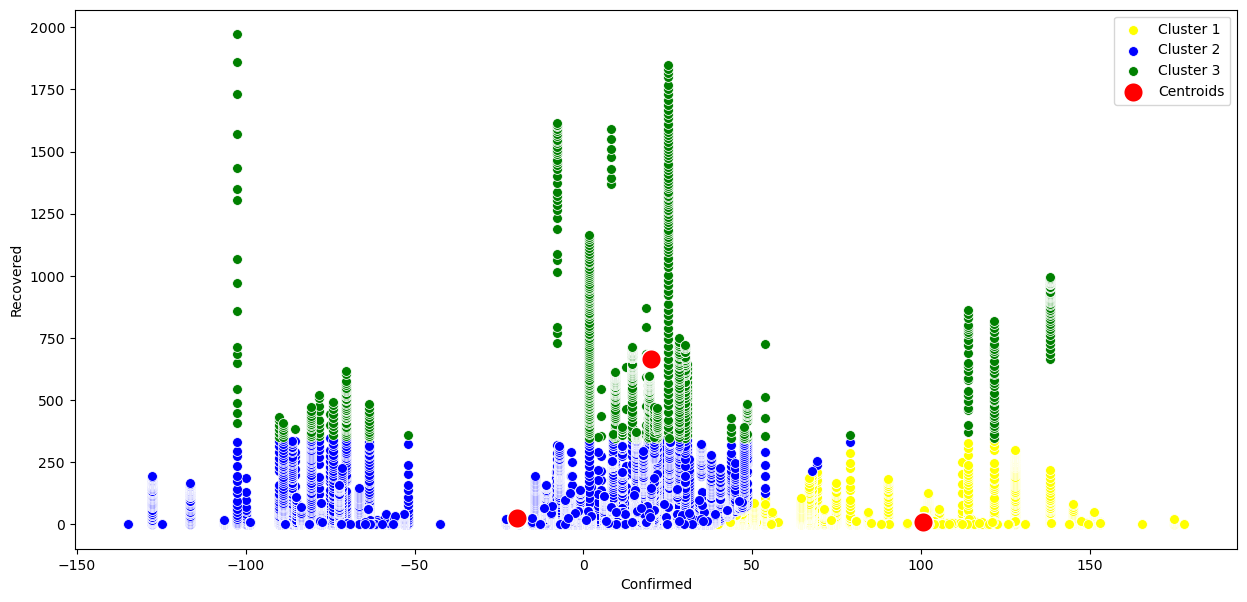

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
sns.scatterplot(x=X[y_means==0,0], y=X[y_means==0,1], color='yellow', label='Cluster 1', s=50)
sns.scatterplot(x=X[y_means==1,0], y=X[y_means==1,1], color='blue', label='Cluster 2', s=50)
sns.scatterplot(x=X[y_means==2,0], y=X[y_means==2,1], color='green', label='Cluster 3', s=50)
# sns.scatterplot(x=X[y_means==3,0], y=X[y_means==3,1], color='yellow', label='Cluster 4', s=50)
plt.xlabel('Confirmed')
plt.ylabel('Recovered')
sns.scatterplot(x=kmeans.cluster_centers_[:4,0], y=kmeans.cluster_centers_[:4,1], color="red", label='Centroids', s=200, markers='s')
plt.show()  # Display the plot

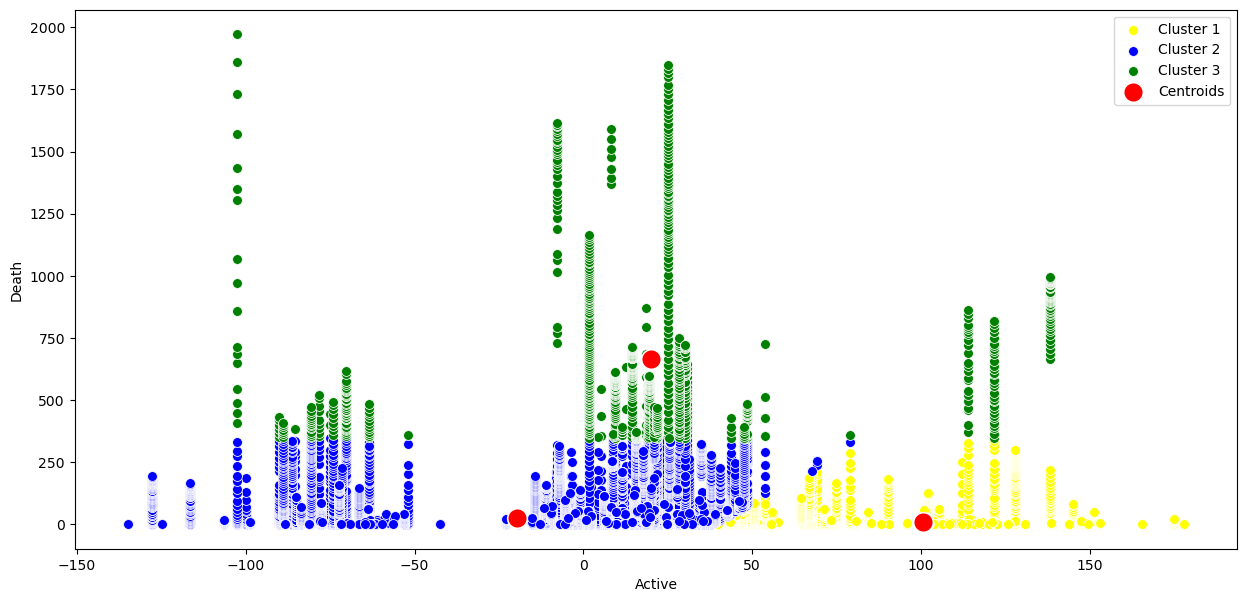

In [30]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=X[y_means==0,0], y=X[y_means==0,1], color='yellow', label='Cluster 1', s=50)
sns.scatterplot(x=X[y_means==1,0], y=X[y_means==1,1], color='blue', label='Cluster 2', s=50)
sns.scatterplot(x=X[y_means==2,0], y=X[y_means==2,1], color='green', label='Cluster 3', s=50)
# sns.scatterplot(x=X[y_means==3,0], y=X[y_means==3,1], color='yellow', label='Cluster 4', s=50)
plt.xlabel('Active')
plt.ylabel('Death')
sns.scatterplot(x=kmeans.cluster_centers_[:4,0], y=kmeans.cluster_centers_[:4,1], color="red", label='Centroids', s=200, markers='s')
plt.show()  # Display the plot